In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,precision_recall_curve,accuracy_score
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,LeavePOut
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import preprocessing
import sklearn.linear_model as LM
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
data=pd.read_csv("../data/player_attr.csv")

In [2]:
print(data.columns.values)

['Unnamed: 0' 'id' 'player_fifa_api_id' 'player_api_id' 'date'
 'overall_rating' 'potential' 'preferred_foot' 'attacking_work_rate'
 'defensive_work_rate' 'crossing' 'finishing' 'heading_accuracy'
 'short_passing' 'volleys' 'dribbling' 'curve' 'free_kick_accuracy'
 'long_passing' 'ball_control' 'acceleration' 'sprint_speed' 'agility'
 'reactions' 'balance' 'shot_power' 'jumping' 'stamina' 'strength'
 'long_shots' 'aggression' 'interceptions' 'positioning' 'vision'
 'penalties' 'marking' 'standing_tackle' 'sliding_tackle' 'gk_diving'
 'gk_handling' 'gk_kicking' 'gk_positioning' 'gk_reflexes']


In [3]:
data['skill'] = data['dribbling'] + data['curve'] + +data['free_kick_accuracy'] + data['long_passing'] + data['ball_control']
data['movement'] = data['acceleration'] + data['sprint_speed'] + data['reactions'] + data['agility'] + data['balance']
data['attacking'] = data['crossing'] + data['finishing'] + data['heading_accuracy'] + data['short_passing'] + data["volleys"]
data['power'] = data['stamina'] + data['strength'] + data['jumping'] + data['long_shots'] + data['shot_power']
data['mentality'] = data['aggression'] + data['interceptions'] + data['positioning'] + data['vision'] + data['penalties']
data['defending'] = data['standing_tackle'] + data['sliding_tackle']

In [4]:
data1=data[['player_api_id','skill','movement','attacking','power','mentality','defending']]

In [5]:
data1

,player_api_id,skill,movement,attacking,power,mentality,defending
0,505942,248.0,295.0,269.0,278.0,288.0,138.0
1,505942,248.0,295.0,269.0,278.0,288.0,138.0
2,505942,248.0,295.0,269.0,278.0,251.0,135.0
3,505942,243.0,294.0,264.0,276.0,246.0,129.0
4,505942,243.0,294.0,264.0,276.0,246.0,129.0
...,...,...,...,...,...,...,...
183973,39902,417.0,374.0,386.0,354.0,391.0,61.0
183974,39902,404.0,357.0,364.0,337.0,355.0,61.0
183975,39902,404.0,357.0,359.0,337.0,361.0,61.0
183976,39902,410.0,340.0,358.0,334.0,335.0,62.0


In [6]:
data1['skill']=10*data1['skill']/data1['skill'].max()

In [7]:
data1['movement']=10*data1['movement']/data1['movement'].max()

In [8]:
data1['attacking']=10*data1['attacking']/data1['attacking'].max()

In [9]:
data1['mentality']=10*data1['mentality']/data1['mentality'].max()

In [10]:
data1['power']=10*data1['power']/data1['power'].max()

In [11]:
data1['defending']=10*data1['defending']/data1['defending'].max()

In [12]:
data1=data1.groupby('player_api_id').mean()

In [13]:
data1=data1.reset_index()
data1

,player_api_id,skill,movement,attacking,power,mentality,defending
0,2625,6.034323,6.634820,5.488808,7.007937,6.499537,6.509653
1,2752,4.529994,4.937822,5.171165,6.148148,5.853132,7.364221
2,2768,4.879406,6.452330,5.648453,5.817989,5.860331,8.126126
3,2770,8.020202,6.619958,7.764977,6.934815,6.518359,3.380180
4,2790,6.922078,7.286624,6.304147,6.471111,6.647948,7.762162
...,...,...,...,...,...,...,...
11055,744907,5.633609,6.761243,5.444072,5.684848,4.563126,5.292383
11056,746419,5.043290,7.579618,4.539171,4.888889,5.399568,7.081081
11057,748432,3.961039,5.987261,4.700461,5.688889,4.881210,7.405405
11058,750435,5.668591,6.973343,5.967742,5.955556,4.802016,2.162162


In [14]:
data1=data1.dropna(axis=0,how='all')

In [15]:
data1

,player_api_id,skill,movement,attacking,power,mentality,defending
0,2625,6.034323,6.634820,5.488808,7.007937,6.499537,6.509653
1,2752,4.529994,4.937822,5.171165,6.148148,5.853132,7.364221
2,2768,4.879406,6.452330,5.648453,5.817989,5.860331,8.126126
3,2770,8.020202,6.619958,7.764977,6.934815,6.518359,3.380180
4,2790,6.922078,7.286624,6.304147,6.471111,6.647948,7.762162
...,...,...,...,...,...,...,...
11055,744907,5.633609,6.761243,5.444072,5.684848,4.563126,5.292383
11056,746419,5.043290,7.579618,4.539171,4.888889,5.399568,7.081081
11057,748432,3.961039,5.987261,4.700461,5.688889,4.881210,7.405405
11058,750435,5.668591,6.973343,5.967742,5.955556,4.802016,2.162162


In [16]:
data_test=data1[0:5].dropna()

In [17]:
print(data_test.columns.values)

['player_api_id' 'skill' 'movement' 'attacking' 'power' 'mentality'
 'defending']


In [18]:
kinds=list(data_test['player_api_id'])

In [19]:
data_test=data_test.drop(['player_api_id'],axis=1)
labels=data_test.columns.values

In [20]:
result = pd.concat([data_test, data_test[[labels[0]]]], axis=1) 

In [21]:
centers = np.array(result.iloc[:,:])

In [22]:
centers

array([[6.03432282, 6.63481953, 5.48880843, 7.00793651, 6.49953718,
        6.50965251, 6.03432282],
       [4.52999382, 4.93782226, 5.17116524, 6.14814815, 5.85313175,
        7.36422136, 4.52999382],
       [4.87940631, 6.4523304 , 5.64845293, 5.81798942, 5.86033117,
        8.12612613, 4.87940631],
       [8.02020202, 6.61995754, 7.76497696, 6.93481481, 6.51835853,
        3.38018018, 8.02020202],
       [6.92207792, 7.2866242 , 6.30414747, 6.47111111, 6.64794816,
        7.76216216, 6.92207792]])

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

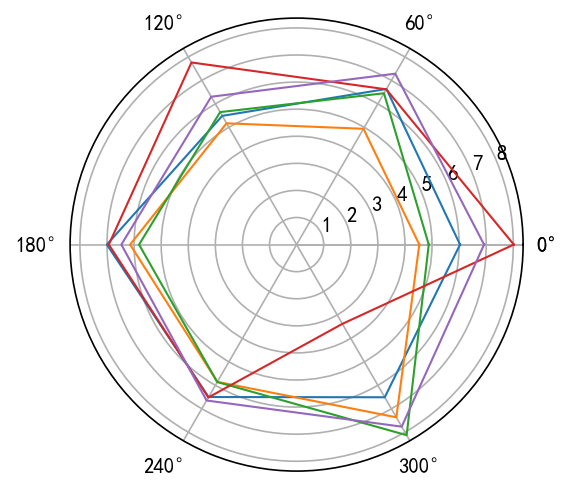

In [23]:
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, polar=True) 
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linewidth=1, label=kinds[i])
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('different kind')
plt.legend(loc='lower right')
plt.show()

In [24]:
data_league=pd.read_excel("联赛.xlsx")

In [25]:
data_league=pd.DataFrame(data_league.values.T,index=data_league.columns,columns=data_league.index)
data_league

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
Belgium Jupiler League,39890.0,38327.0,95597.0,30934.0,37990.0,38391.0,39153.0,37900.0,36835.0,38252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England Premier League,30726.0,23686.0,32562.0,36374.0,30380.0,31465.0,35442.0,23932.0,23021.0,30859.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France Ligue 1,40714.0,30458.0,41186.0,26295.0,145039.0,26233.0,26523.0,26359.0,41301.0,26150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany 1. Bundesliga,27284.0,36147.0,37322.0,30820.0,27467.0,36058.0,33339.0,36029.0,37377.0,25524.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy Serie A,42390.0,39599.0,37503.0,24454.0,24503.0,34530.0,39351.0,35644.0,39323.0,42422.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netherlands Eredivisie,37216.0,26589.0,42710.0,26510.0,37193.0,26663.0,5044.0,109060.0,26002.0,30841.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poland Ekstraklasa,47249.0,13436.0,68835.0,13320.0,13390.0,43313.0,93450.0,115268.0,68740.0,136539.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portugal Liga ZON Sagres,97363.0,40610.0,150077.0,97498.0,40604.0,19515.0,22125.0,40963.0,33550.0,115171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scotland Premier League,43230.0,23445.0,32693.0,32418.0,30974.0,11024.0,69259.0,9183.0,32679.0,32496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain LIGA BBVA,19435.0,24591.0,33018.0,75195.0,37579.0,38520.0,46531.0,25563.0,33764.0,39989.0,...,37871.0,96627.0,38577.0,19277.0,38794.0,295200.0,194036.0,156556.0,211118.0,636565.0


In [26]:
X=data_league.values
X

array([[ 39890.,  38327.,  95597., ...,     nan,     nan,     nan],
       [ 30726.,  23686.,  32562., ...,     nan,     nan,     nan],
       [ 40714.,  30458.,  41186., ...,     nan,     nan,     nan],
       ...,
       [ 43230.,  23445.,  32693., ...,     nan,     nan,     nan],
       [ 19435.,  24591.,  33018., ..., 156556., 211118., 636565.],
       [ 95231.,  39420.,  42276., ...,     nan,     nan,     nan]])

In [27]:
data_1=data1[data['player_api_id'].isin(X[0])]
data2=data1[data['player_api_id'].isin(X[0])]
data3=data1[data['player_api_id'].isin(X[0])]
data4=data1[data['player_api_id'].isin(X[0])]
data5=data1[data['player_api_id'].isin(X[0])]
data6=data1[data['player_api_id'].isin(X[0])]
data7=data1[data['player_api_id'].isin(X[0])]
data8=data1[data['player_api_id'].isin(X[0])]
data9=data1[data['player_api_id'].isin(X[0])]
data10=data1[data['player_api_id'].isin(X[0])]
data11=data1[data['player_api_id'].isin(X[0])]

In [28]:
data_1

,player_api_id,skill,movement,attacking,power,mentality,defending
392,19446,7.492785,7.763623,7.100614,7.785185,7.710583,7.486486
393,19488,7.316017,7.009402,6.958525,7.219048,6.732490,7.351351
446,21785,NaN,NaN,NaN,NaN,NaN,NaN
447,21812,6.787260,6.882014,6.672153,7.412698,6.945387,7.451737
448,21834,6.616717,7.003103,6.478199,6.758974,6.260176,6.299376
449,21849,5.694960,7.151198,6.981567,7.891270,6.897562,6.233591
450,21853,6.551227,7.955886,7.538402,7.258025,6.277898,2.798799
465,22139,5.786436,7.112527,6.735791,7.032099,5.819534,3.837838
466,22234,7.425685,7.091295,7.967742,7.373333,6.734341,2.760360
467,22283,5.727552,7.540579,6.301472,7.615054,6.234933,7.551874


In [29]:
data_try=data1
data_try[0]=data_1.mean()
data_try[1]=data2.mean()
data_try[2]=data3.mean()
data_try[3]=data4.mean()
data_try[4]=data5.mean()
data_try[5]=data6.mean()
data_try[6]=data7.mean()
data_try[8]=data9.mean()
data_try[9]=data10.mean()
data_try[10]=data11.mean()

In [30]:
data_try=data_try.iloc[0:11,1:7]
data_try

,skill,movement,attacking,power,mentality,defending
0,6.034323,6.634820,5.488808,7.007937,6.499537,6.509653
1,4.529994,4.937822,5.171165,6.148148,5.853132,7.364221
2,4.879406,6.452330,5.648453,5.817989,5.860331,8.126126
3,8.020202,6.619958,7.764977,6.934815,6.518359,3.380180
4,6.922078,7.286624,6.304147,6.471111,6.647948,7.762162
5,2.077922,6.024062,2.095238,4.720000,2.561555,1.935135
6,8.409091,8.341054,7.959782,7.467677,7.112704,4.272727
7,6.650433,7.312709,5.785056,7.967460,7.397408,7.544402
8,7.382305,7.368631,6.699309,6.844444,5.967873,3.101351
9,7.713267,8.492569,7.702629,7.641176,6.609707,2.515103


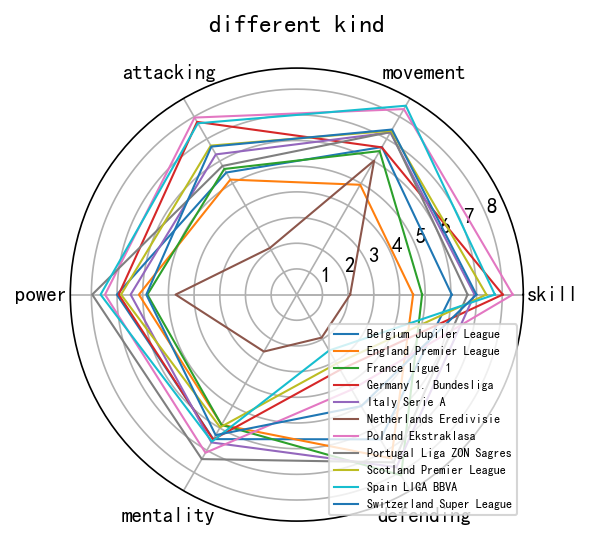

In [31]:
kinds=list(data_league.index)
labels=data_try.columns.values
result = pd.concat([data_try, data_try[[labels[0]]]], axis=1) 
centers = np.array(result.iloc[:,:])
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, polar=True) 
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linewidth=1, label=kinds[i])
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('different kind')
plt.legend(loc='lower right',fontsize='xx-small')
plt.show()